# Assignment 1 - Logan Bolton

This was an individual project and I did everything in it without a partner.

## GenAI Disclaimer

I used GPT-5 to help with the implementation of the exact code syntax that I needed. I came up with the overall structure and solution to the problems.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io 
from skimage import color as change

import cv2

from IPython.display import Image

# Task 1: Photometric Decoder

The main problem I ran into is that the grayscale method changed the image from having 3 channels to have 2 channels. This change in dimensions broke my other functions. I was also suprised to see how contrast stretching didn't work that well. Gamme correction was the most succesful method to show the message. The other transformations were just the cherry on top. 

<Figure size 640x480 with 0 Axes>

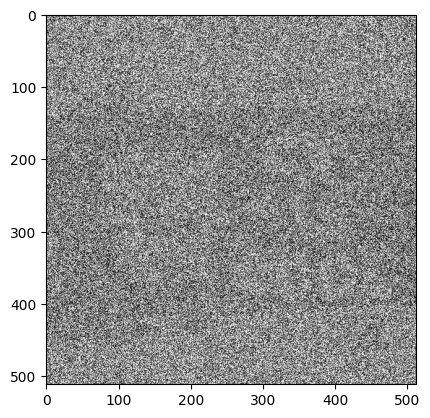

<Figure size 640x480 with 0 Axes>

In [ ]:
photometric_path = "photometric_hidden_image.png"


img = cv2.imread(photometric_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.figure()

In [128]:
def grayscale(image, weighted=True):
    if weighted:
        return (0.299 * image[:,:,0] + 
                 0.587 * image[:,:,1] + 
                 0.114 * image[:,:,2]).astype(np.uint8)
    else:
        return np.mean(image, axis=2).astype(np.uint8)

def brightness(image, brightness=0):
    return np.clip(image.astype(np.int16) + brightness, 0, 255).astype(np.uint8)

def contrast_stretch(image):
    if image.ndim == 2:
        ch = image.astype(np.float32)
        mn, mx = ch.min(), ch.max()
        if mx == mn:
            return np.zeros_like(image, dtype=np.uint8)
        return ((ch - mn) / (mx - mn) * 255).astype(np.uint8)

    stretched = np.zeros_like(image)
    for c in range(image.shape[2]):
        ch = image[:, :, c].astype(np.float32)
        mn, mx = ch.min(), ch.max()
        if mx == mn:
            stretched[:, :, c] = 0
        else:
            stretched[:, :, c] = ((ch - mn) / (mx - mn) * 255).astype(np.uint8)
    return stretched

def gamma_correction(image, gamma=1.0):
    x = image.astype(np.float32) / 255.0
    y = np.power(x, gamma)
    return np.clip(y * 255, 0, 255).astype(np.uint8)
    


(-0.5, 511.5, 511.5, -0.5)

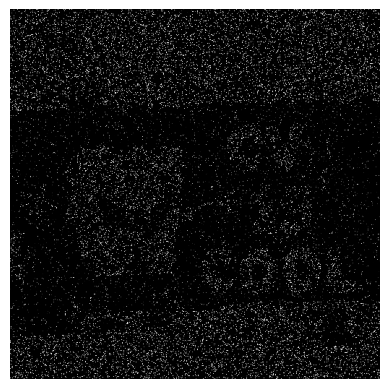

In [161]:
img = cv2.imread(photometric_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB

img = gamma_correction(img, 35)
img = contrast_stretch(img)
img = grayscale(img, weighted=False)
img = brightness(img, -80)


plt.imshow(img, cmap='gray')
plt.axis('off')

# Task 2: Geometric Puzzle Solver

I originally tried to replicate the lecture code by handcrafting the matrix multiplication for each type of transformation at each step. This got out of hand super quickly and so I made methods for each type of transformation. I also discovered that cv2 has some super handle tools to do these types of transformations quickly, so I moved to that.

<Figure size 640x480 with 0 Axes>

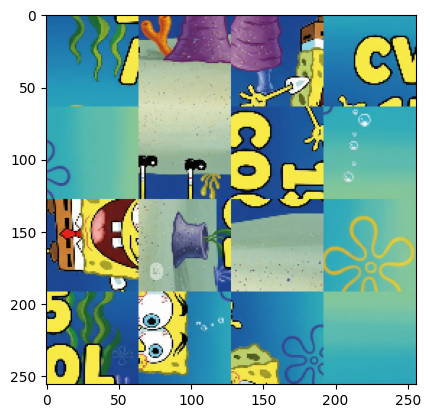

<Figure size 640x480 with 0 Axes>

In [ ]:
geometric_path = "geometric_puzzle_scrambled.png"

img = cv2.imread(geometric_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB

plt.imshow(img)
plt.figure()

In [ ]:
def tile_slice(r, c, size=64):
    y0, x0 = r*size, c*size          # rows -> y, cols -> x
    return slice(y0, y0+size), slice(x0, x0+size)

def rotate_tile(img, tile, clockwise=True, size=64):
    r, c = tile
    ys, xs = tile_slice(r, c, size)
    patch = img[ys, xs]
    rot_flag = cv2.ROTATE_90_CLOCKWISE
    img[ys, xs] = cv2.rotate(patch, rot_flag)
    return img

def swap_tiles(img, tile1, tile2, size=64):
    r1, c1 = tile1
    r2, c2 = tile2
    ys1, xs1 = tile_slice(r1, c1, size)
    ys2, xs2 = tile_slice(r2, c2, size)

    tmp = img[ys1, xs1].copy() 
    img[ys1, xs1] = img[ys2, xs2]
    img[ys2, xs2] = tmp
    return img

def flip_horizontal(img, tile, size=64):
    r, c = tile
    ys, xs = tile_slice(r, c, size)
    img[ys, xs] = cv2.flip(img[ys, xs], 1)
    return img

def flip_vertical(img, tile, size=64):
    r, c = tile
    ys, xs = tile_slice(r, c, size)
    img[ys, xs] = cv2.flip(img[ys, xs], 0)
    return img
 

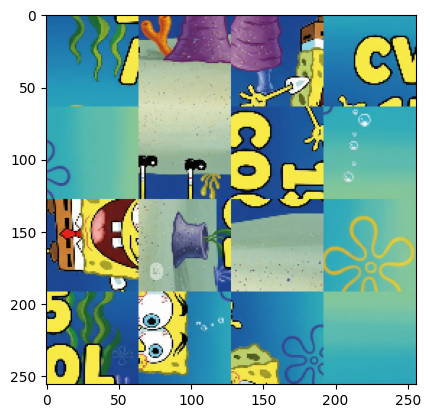

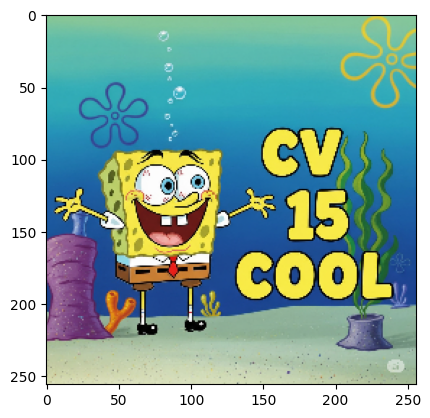

In [67]:
img = cv2.imread(geometric_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB

# Original image
plt.imshow(img)
plt.figure()

# Rotate Image
img = rotate_tile(img, (0, 0))
img = rotate_tile(img, (0, 0))

img = rotate_tile(img, (0, 2))
img = rotate_tile(img, (0, 2))

img = rotate_tile(img, (1, 1))
img = rotate_tile(img, (1, 1))

img = rotate_tile(img, (1, 2))
img = rotate_tile(img, (1, 2))
img = rotate_tile(img, (1, 2))

img = rotate_tile(img, (2, 0))
img = rotate_tile(img, (2, 0))
img = rotate_tile(img, (2, 0))

img = rotate_tile(img, (2, 1))
img = rotate_tile(img, (2, 1))
img = rotate_tile(img, (2, 1))

img = rotate_tile(img, (3, 1))
img = rotate_tile(img, (3, 1))
img = rotate_tile(img, (3, 1))

img = rotate_tile(img, (3, 2))
img = rotate_tile(img, (3, 2))
img = rotate_tile(img, (3, 2))

# plt.imshow(img)
# plt.show()

# Rotate Tiles
img = swap_tiles(img, (1, 1), (3, 2))
img = swap_tiles(img, (1, 1), (0, 1))
img = swap_tiles(img, (3, 1), (0, 2))
img = swap_tiles(img, (2, 0), (1, 2))
img = swap_tiles(img, (2, 0), (1, 3))
img = swap_tiles(img, (3, 1), (1, 1))
img = swap_tiles(img, (3, 2), (2, 2))

img = swap_tiles(img, (0, 1), (0, 0))
img = swap_tiles(img, (0, 2), (0, 1))
img = swap_tiles(img, (0, 3), (0, 2))

img = swap_tiles(img, (1, 1), (1, 0))
img = swap_tiles(img, (1, 2), (1, 1))
img = swap_tiles(img, (1, 3), (1, 2))

img = swap_tiles(img, (1, 0), (2, 0))
img = swap_tiles(img, (0, 0), (1, 0))
img = swap_tiles(img, (0, 1), (1, 1))
img = swap_tiles(img, (0, 1), (2, 1))
img = swap_tiles(img, (1, 2), (2, 2))
img = swap_tiles(img, (0, 2), (1, 2))
img = swap_tiles(img, (0, 3), (1, 3))

img = swap_tiles(img, (3, 0), (2, 3))
img = swap_tiles(img, (0, 3), (0, 0))
img = swap_tiles(img, (3, 1), (3, 0))
img = swap_tiles(img, (0, 1), (3, 3))
img = swap_tiles(img, (0, 2), (3, 1))
img = swap_tiles(img, (0, 3), (0, 1))
img = swap_tiles(img, (0, 2), (0, 3))

# Flip Tiles & Polish

# plt.imshow(img)
# plt.show()

img = flip_vertical(img, (0, 0))
img = flip_horizontal(img, (0, 0))  
img = rotate_tile(img, (0, 0))

img = flip_vertical(img, (0, 1))  

img = flip_horizontal(img, (3, 0))
img = flip_horizontal(img, (2, 0))
img = flip_horizontal(img, (3, 1))

img = rotate_tile(img, (0, 3))
img = rotate_tile(img, (0, 3))
img = rotate_tile(img, (0, 3))

plt.imshow(img)
plt.show()
